<a href="https://colab.research.google.com/github/Kshah002/ML-CaPsule/blob/master/AutoML_GSSoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pycaret

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2

Regression with PyCaret

Dataset - Boston_housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,Description,Value
0,Session id,123
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0378,9.4958,2.9283,0.8884,0.1298,0.1000,0.3290
gbr,Gradient Boosting Regressor,2.1748,9.6803,3.0274,0.8788,0.1434,0.1117,0.1430
rf,Random Forest Regressor,2.2316,10.6310,3.1448,0.8673,0.1447,0.1129,0.4510
lightgbm,Light Gradient Boosting Machine,2.3305,11.5722,3.2969,0.8566,0.1482,0.1157,0.1790
xgboost,Extreme Gradient Boosting,2.4154,12.5225,3.4385,0.8452,0.1539,0.1196,0.2410
ada,AdaBoost Regressor,2.8789,15.9344,3.8667,0.8055,0.1803,0.1517,0.1210
dt,Decision Tree Regressor,2.9307,19.6150,4.2538,0.7368,0.1909,0.1455,0.0250
ridge,Ridge Regression,3.2793,22.8402,4.6440,0.7300,0.2460,0.1664,0.0240
lr,Linear Regression,3.3006,22.7209,4.6402,0.7295,0.2526,0.1668,0.7600
br,Bayesian Ridge,3.3158,23.2769,4.6862,0.7258,0.2453,0.1673,0.0300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

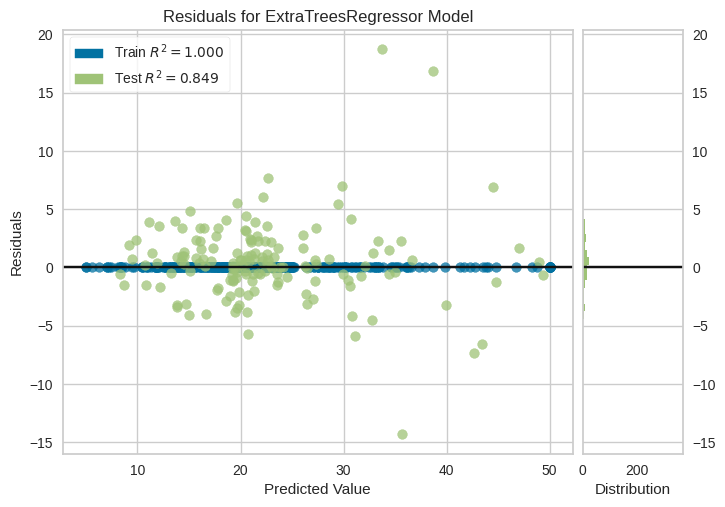

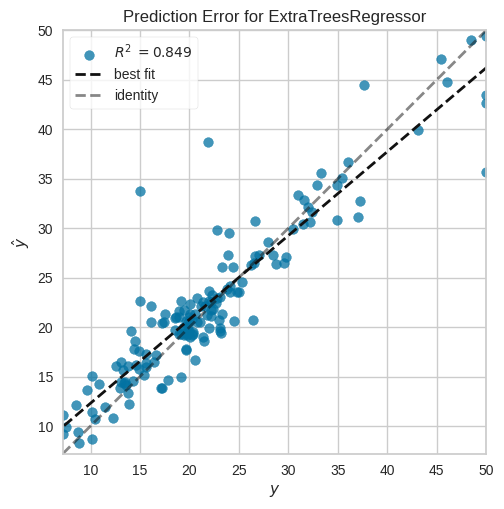

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import setup, compare_models, plot_model, evaluate_model

data = get_data('boston')

# Setting up the regression environment
reg = setup(data, target='medv', session_id=123)

# Comparing all models
best_model = compare_models()

# Plotting model performance
plot_model(best_model, plot='residuals')
plot_model(best_model, plot='error')
evaluate_model(best_model)


Classification with PyCaret

Dataset - Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0510
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0560
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0350
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0310
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.3310
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0380
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.1630
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.2870
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0400
rf,Random Forest Classifier,0.9264,0.9909,0.9264,0.9343,0.9232,0.8886,0.8956,0.3490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

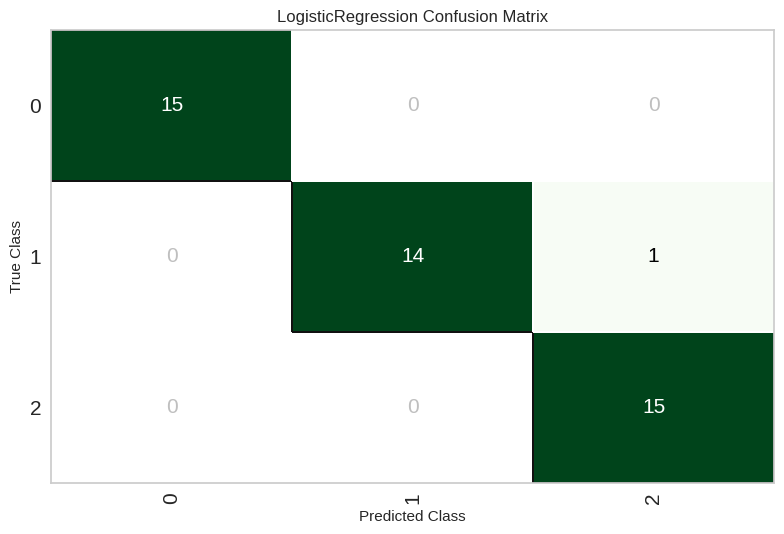

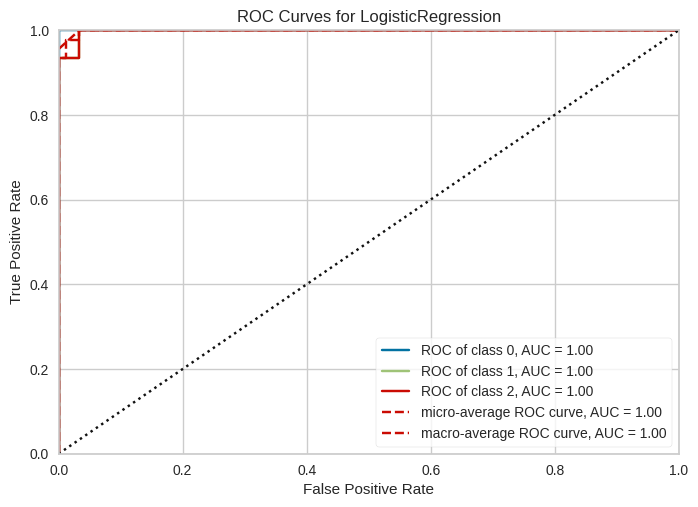

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import setup, compare_models, plot_model, evaluate_model

data = get_data('iris')

# Setting up the classification environment
clf = setup(data, target='species', session_id=123)

# Comparing all models
best_model = compare_models()

# Plotting model performance
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
evaluate_model(best_model)


# 2. H2O AutoML

In [ ]:
!pip install h2o

  Using cached h2o-3.46.0.3.tar.gz (265.3 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.3-py2.py3-none-any.whl size=265365897 sha256=9137cef348dfed91d85feae68edc47ce515976b85e38d5c6d5979dd82ac60eee
  Stored in directory: /root/.cache/pip/wheels/c4/63/41/baa115b5255e1db3e2383bce4e2e6181746aac0b42264c242f
Successfully built h2o


Regression with H2O AutoML

Dataset - Boston_housing

In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset
url = "http://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data = response.text.split("\n")

# Process the dataset
header = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
raw_data = data[22:]  # The actual data starts at line 23

# Parsing the data into a format readable by pandas
data = []
for i in range(0, len(raw_data) - 1, 2):
    row1 = list(map(float, raw_data[i].strip().split()))
    row2 = list(map(float, raw_data[i+1].strip().split()))
    data.append(row1 + row2)

# Create a DataFrame
df = pd.DataFrame(data, columns=header)

# Initialize H2O
h2o.init()

# Convert to H2OFrame
hf = h2o.H2OFrame(df)

# Define target and features
y = 'MEDV'
x = hf.columns
x.remove(y)

# Split the data into train and test sets
train, test = hf.split_frame(ratios=[.8], seed=1234)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1234)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# Predict on the test set
preds = aml.leader.predict(test)
print(preds.head())


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,25 mins 23 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_62vsjk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.085 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   rmse       mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_3_20240618_60156  3.15382   9.94661  2.05668  0.141455                   9.94661
GBM_grid_1_AutoML_3_20240618_60156_model_1              3.19951  10.2369   2.08508  0.141747                  10.2369
XGBoost_grid_1_AutoML_3_20240618_60156_model_24         3.25097  10.5688   2.17213  0.14893                   10.5688
StackedEnsemble_BestOfFamily_3_AutoML_3_20240618_60156  3.26392  10.6531   2.11243  0.144641                  10.6531
StackedEnsemble_BestOfFamily_2_AutoML_3_20240618_60156  3.28705  10.8047   2.12499  0.145846                  10.8047
GBM_grid_1_AutoML_3_20240618_60156_model_8              3.28857  10.8147   2.16152  0.147606        

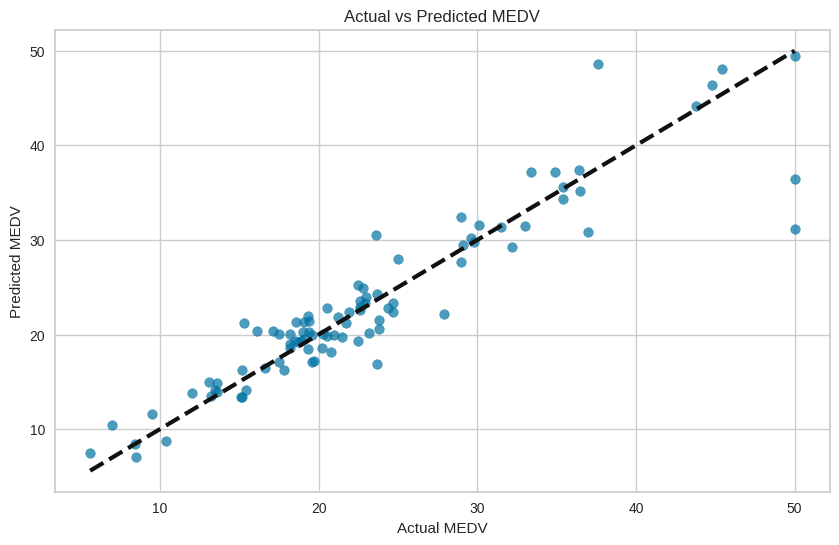

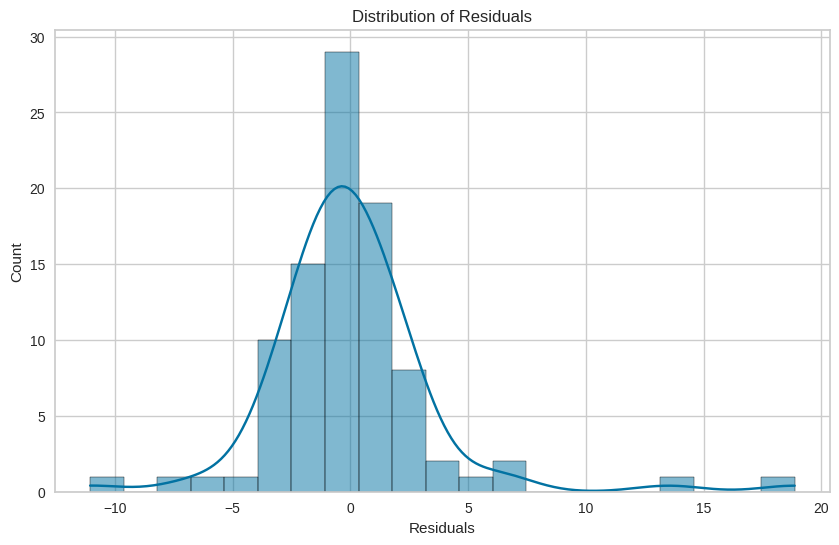

In [ ]:
# Convert predictions to a pandas DataFrame
preds_df = preds.as_data_frame()
test_df = test.as_data_frame()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_df['MEDV'], preds_df['predict'], alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.plot([test_df['MEDV'].min(), test_df['MEDV'].max()], [test_df['MEDV'].min(), test_df['MEDV'].max()], 'k--', lw=3)
plt.show()

# Residuals plot
residuals = test_df['MEDV'] - preds_df['predict']
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


Classification with H2O AutoML

Dataset - Iris

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.datasets import load_iris
import pandas as pd

# Initialize H2O
h2o.init()

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Convert to H2OFrame
hf = h2o.H2OFrame(df)

# Define target and features
y = 'species'
x = hf.columns
x.remove(y)

# Split the data into train and test sets
train, test = hf.split_frame(ratios=[.8], seed=1234)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1234)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# Predict on the test set
preds = aml.leader.predict(test)
print(preds.head())


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 27 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_62vsjk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.940 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███
07:04:35.986: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

████████████████████████████████████████████████████████████| (done) 100%
model_id                                               mean_per_class_error    logloss      rmse        mse
GLM_1_AutoML_4_20240618_70425                                     0.0391844  0.0802971  0.159766  0.0255252
XGBoost_grid_1_AutoML_4_20240618_70425_model_15                   0.0391844  0.211914   0.2213    0.0489739
XGBoost_grid_1_AutoML_4_20240618_70425_model_29                   0.0404255  0.182995   0.210106  0.0441444
XGBoost_grid_1_AutoML_4_20240618_70425_model_1                    0.0404255  0.227903   0.233957  0.054736
GBM_grid_1_AutoML_4_20240618_70425_model_51                       0.0404255  0.353455   0.308997  0.095479
DeepLearn

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          14           0          0
versicolor       0           9          1
virginica        0           0          3


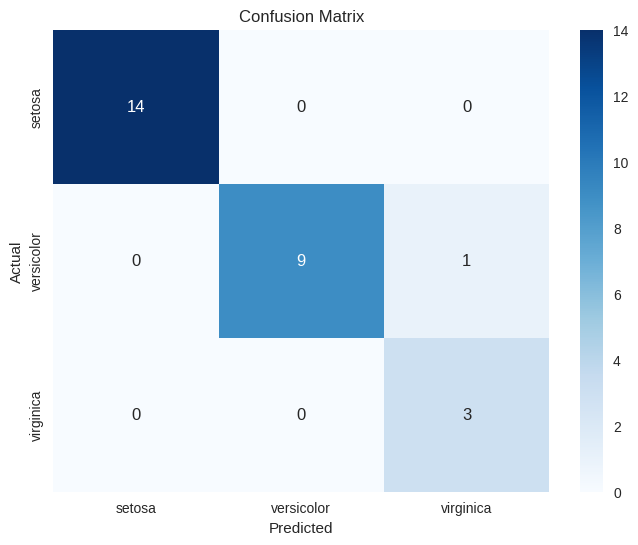

H2O session _sid_856a closed.


In [ ]:
# Convert predictions to pandas DataFrame
preds_df = preds.as_data_frame()
test_df = test.as_data_frame()

# Confusion matrix
confusion_matrix = pd.crosstab(test_df['species'], preds_df['predict'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve (for binary classification tasks)
if len(iris.target_names) == 2:
    perf = aml.leader.model_performance(test_data=test)
    perf.plot()

# Shutdown H2O
h2o.shutdown()

# 3. TPOT

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=f573d78eb9f712ad26cd9bcb262bdf7104e9dbdb9e296f46ab68c37d1cb020ca
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


Regression with TPOT

Dataset - California_housing

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.2192518729858542

Generation 2 - Current best internal CV score: -0.2192518729858542

Generation 3 - Current best internal CV score: -0.2192518729858542

Generation 4 - Current best internal CV score: -0.2192518729858542

Generation 5 - Current best internal CV score: -0.2192518729858542

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=20, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7500000000000001, verbosity=0)
R2 score on test set: -0.20737752572961898


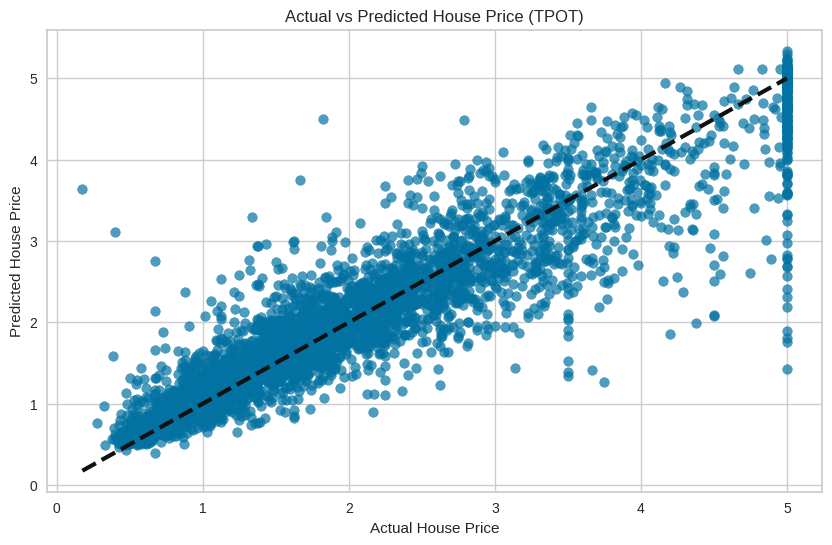

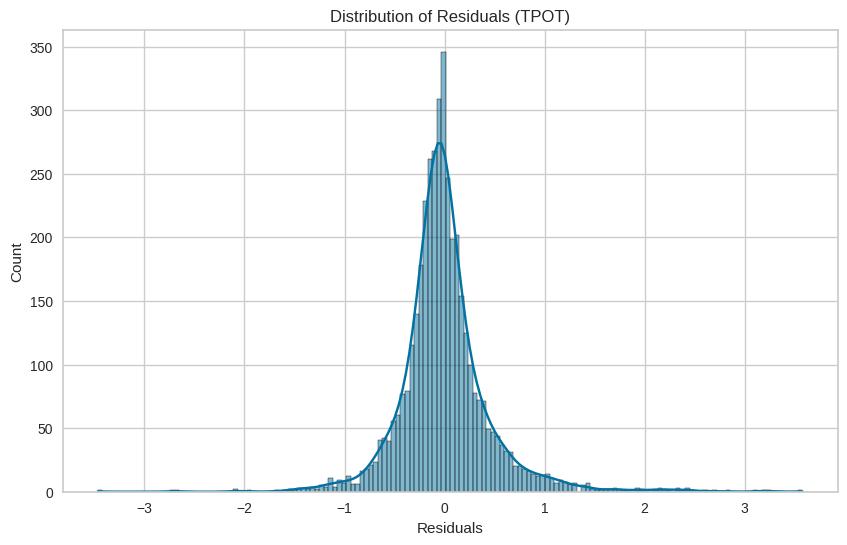

In [ ]:
from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=123, n_jobs=-1)

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Evaluate TPOT on test data
print("R2 score on test set:", tpot.score(X_test, y_test))

# Export the pipeline as Python code
tpot.export('tpot_california_pipeline.py')

# Visualize results
# Scatter plot of actual vs predicted values
preds = tpot.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Price (TPOT)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

# Residuals plot
residuals = y_test - preds
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (TPOT)')
plt.show()


Classification using TPOT

Dataset - Iris

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9916666666666666

Generation 2 - Current best internal CV score: 0.9916666666666666

Generation 3 - Current best internal CV score: 0.9916666666666666

Generation 4 - Current best internal CV score: 0.9916666666666666

Generation 5 - Current best internal CV score: 0.9916666666666666

Best pipeline: DecisionTreeClassifier(MultinomialNB(input_matrix, alpha=0.1, fit_prior=True), criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=2)
Accuracy on test set: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  

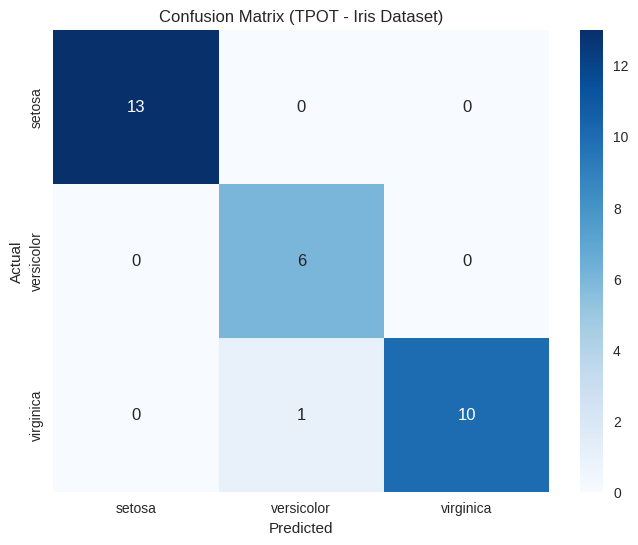

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=123, n_jobs=-1)

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Evaluate TPOT on test data
y_pred = tpot.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Export the pipeline as Python code
tpot.export('tpot_iris_pipeline.py')

# Visualize results
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TPOT - Iris Dataset)')
plt.show()
